# Reporte analítica de datos - Proyecto de Grado II

## Exploración de los datos para el municipio de Girón

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [2]:
giron = pd.read_csv('../dengue_data/Giron.csv')
df = pd.DataFrame(giron)

### *Número de casos reportados por año*

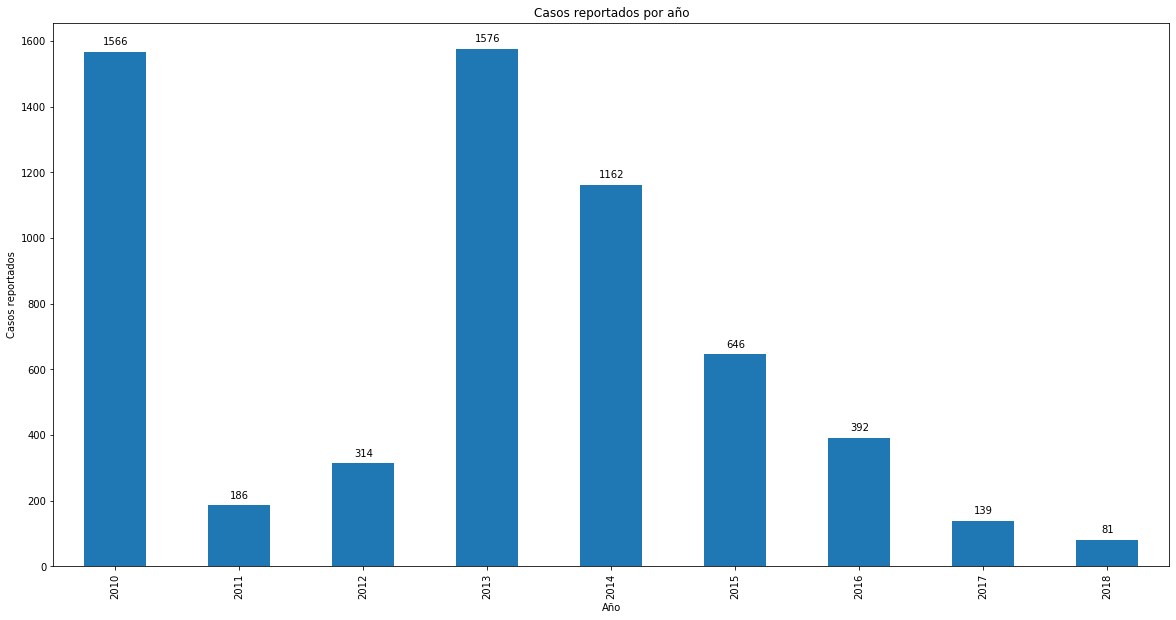

In [3]:
years = df['Ano'].value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
years.set_xlabel('Año')
years.set_ylabel('Casos reportados')
years.set_title('Casos reportados por año')

for p in years.patches:
    years.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

### *Número de casos reportados por mes*

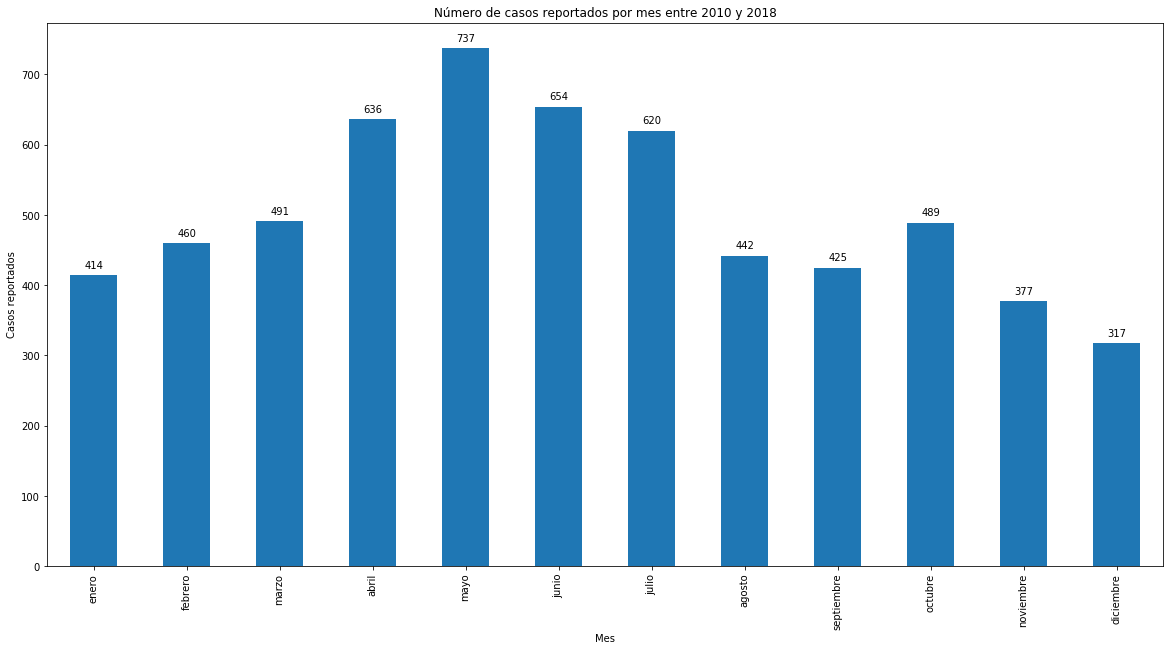

In [4]:
meses = ["enero", "febrero", "marzo", "abril", "mayo", "junio", 
          "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]
df['MesOcurrencia'] = pd.Categorical(df['MesOcurrencia'], categories=meses, ordered=True)
df.sort_values(by="MesOcurrencia")

months = df['MesOcurrencia'].value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
months.set_xlabel('Mes')
months.set_ylabel('Casos reportados')
months.set_title('Número de casos reportados por mes entre 2010 y 2018')

for p in months.patches:
    months.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

Text(0.5, 1.0, 'Número de casos reportados por mes y año')

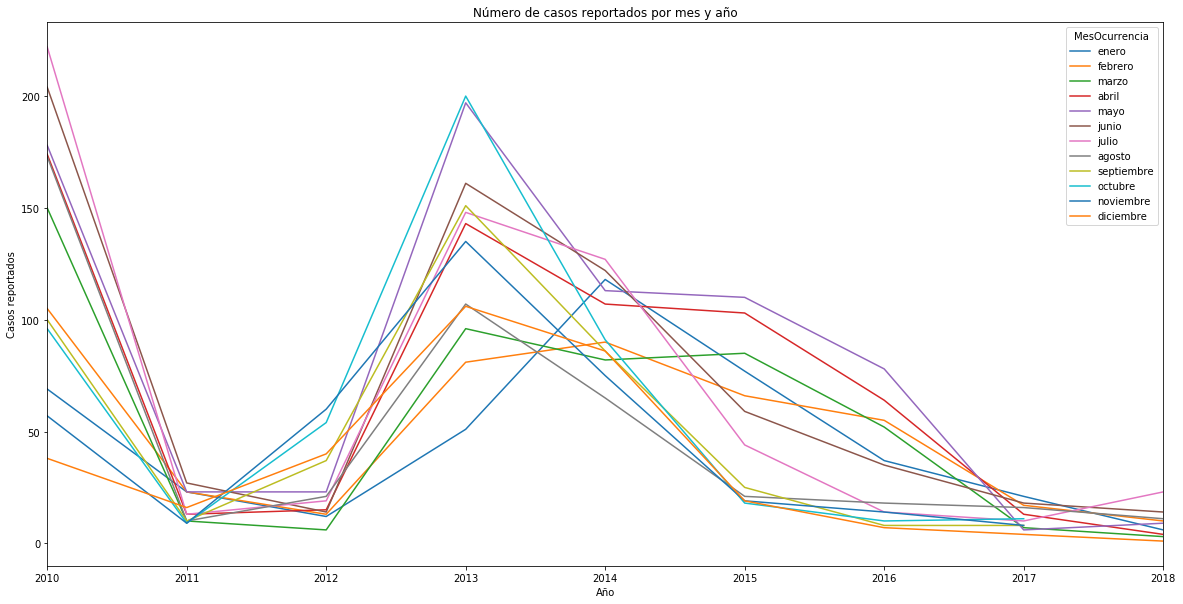

In [5]:
months = giron.groupby(["Ano", 'MesOcurrencia']).size().unstack(level=1).plot(kind='line', figsize=(20,10))
months.set_xlabel('Año')
months.set_ylabel('Casos reportados')
months.set_title('Número de casos reportados por mes y año')

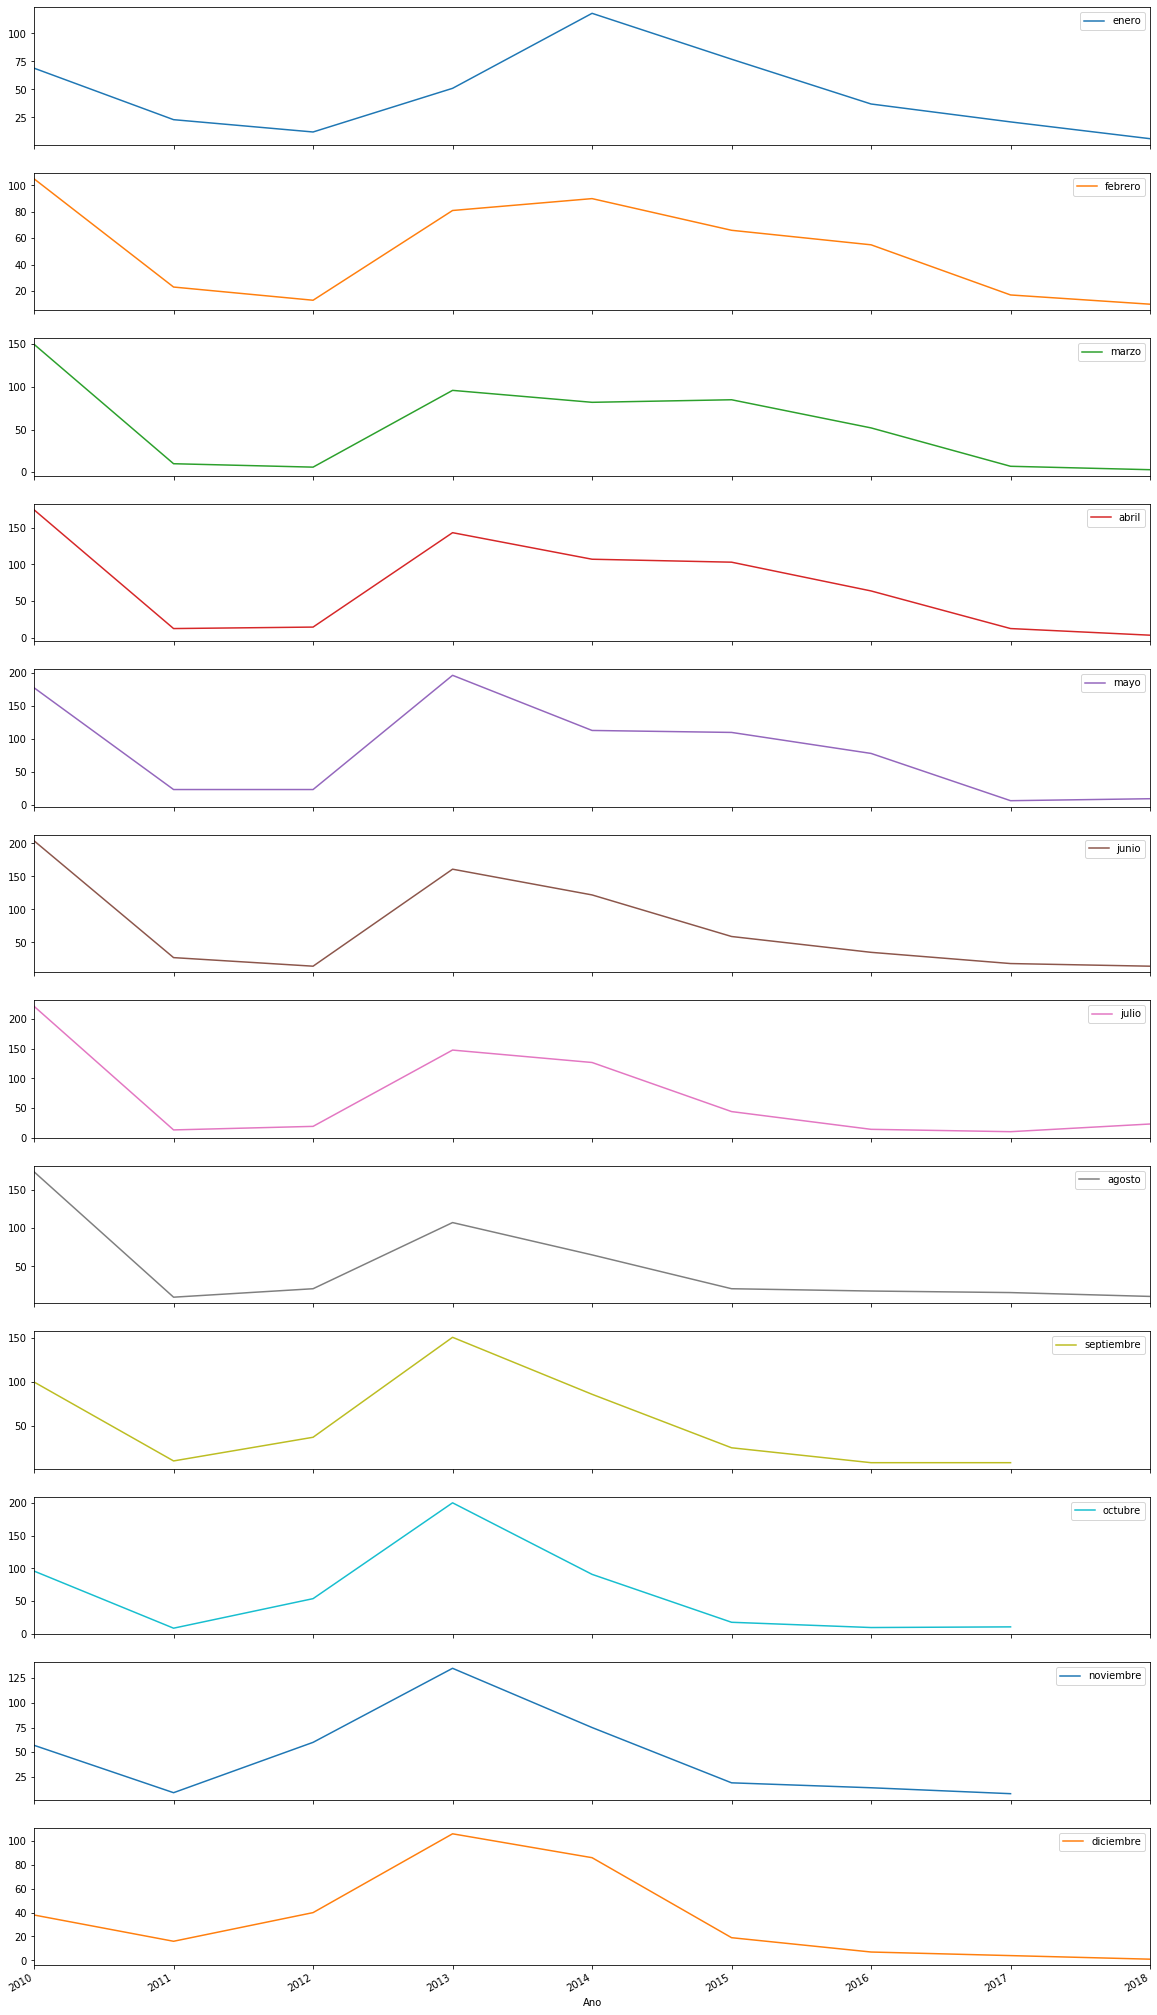

In [6]:
months = giron.groupby(["Ano", 'MesOcurrencia']).size().unstack(level=1).plot(kind='line', figsize=(20,40), subplots=True)


### *Número de casos reportados por sexo*

Text(0.5, 1.0, 'Porcentaje de casos reportados por sexo desde el 2010 hasta el 2018')

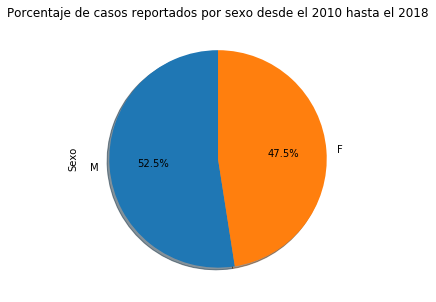

In [7]:
gender = df['Sexo'].value_counts().plot(kind='pie', shadow = True,startangle=90, figsize=(10,5), autopct='%1.1f%%')
gender.set_title("Porcentaje de casos reportados por sexo desde el 2010 hasta el 2018")

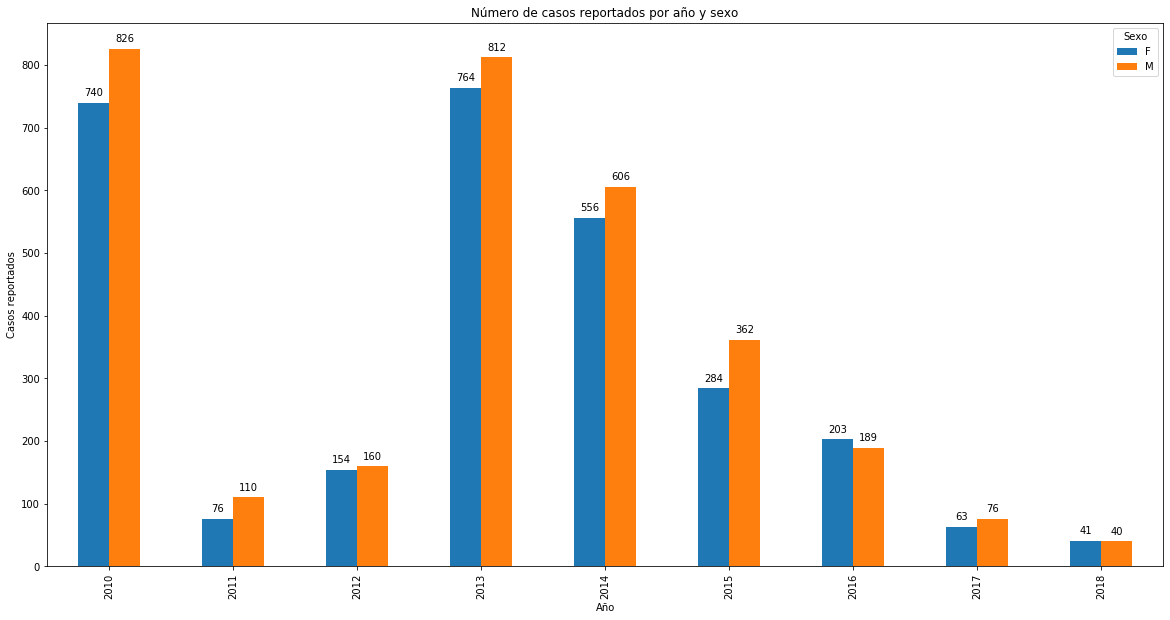

In [8]:
genders_by_year = giron.groupby(["Ano", 'Sexo']).size().unstack(level=1).plot(kind='bar', figsize=(20,10))

genders_by_year.set_xlabel('Año')
genders_by_year.set_ylabel('Casos reportados')
genders_by_year.set_title('Número de casos reportados por año y sexo')

for p in genders_by_year.patches:
    genders_by_year.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

### *Número de casos reportados por comuna*

Text(0.5, 1.0, 'Número de casos reportados por año y comunas')

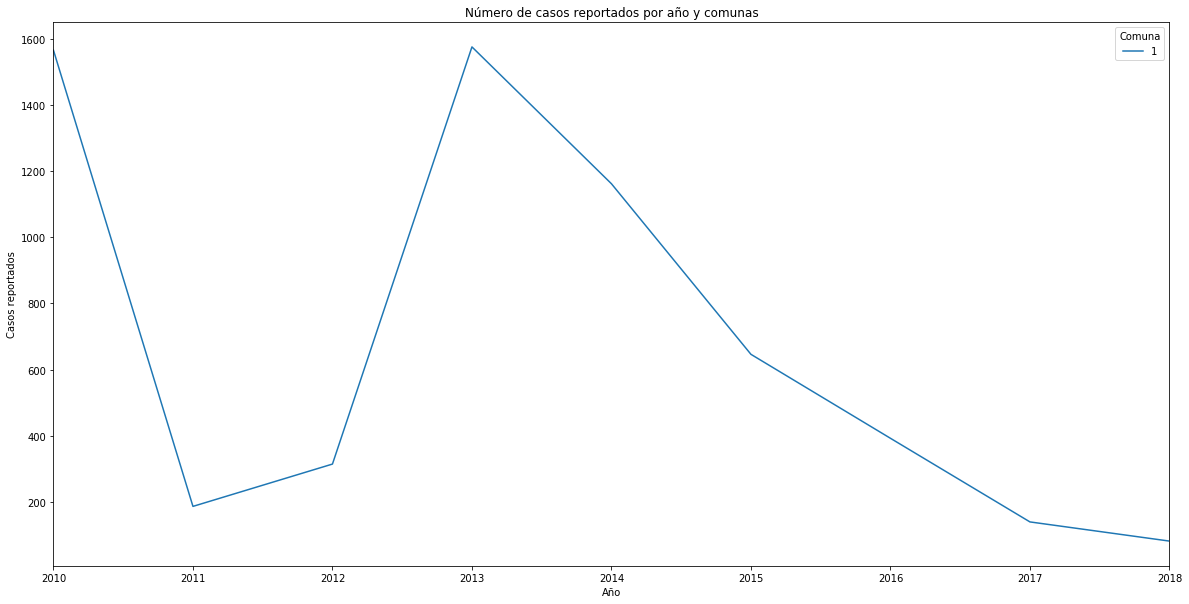

In [9]:
communes_by_year = giron.groupby(["Ano", 'Comuna']).size().unstack(level=1).plot(kind='line', figsize=(20,10))
communes_by_year.set_xlabel('Año')
communes_by_year.set_ylabel('Casos reportados')
communes_by_year.set_title('Número de casos reportados por año y comunas')

### *Número de casos reportados por barrio*

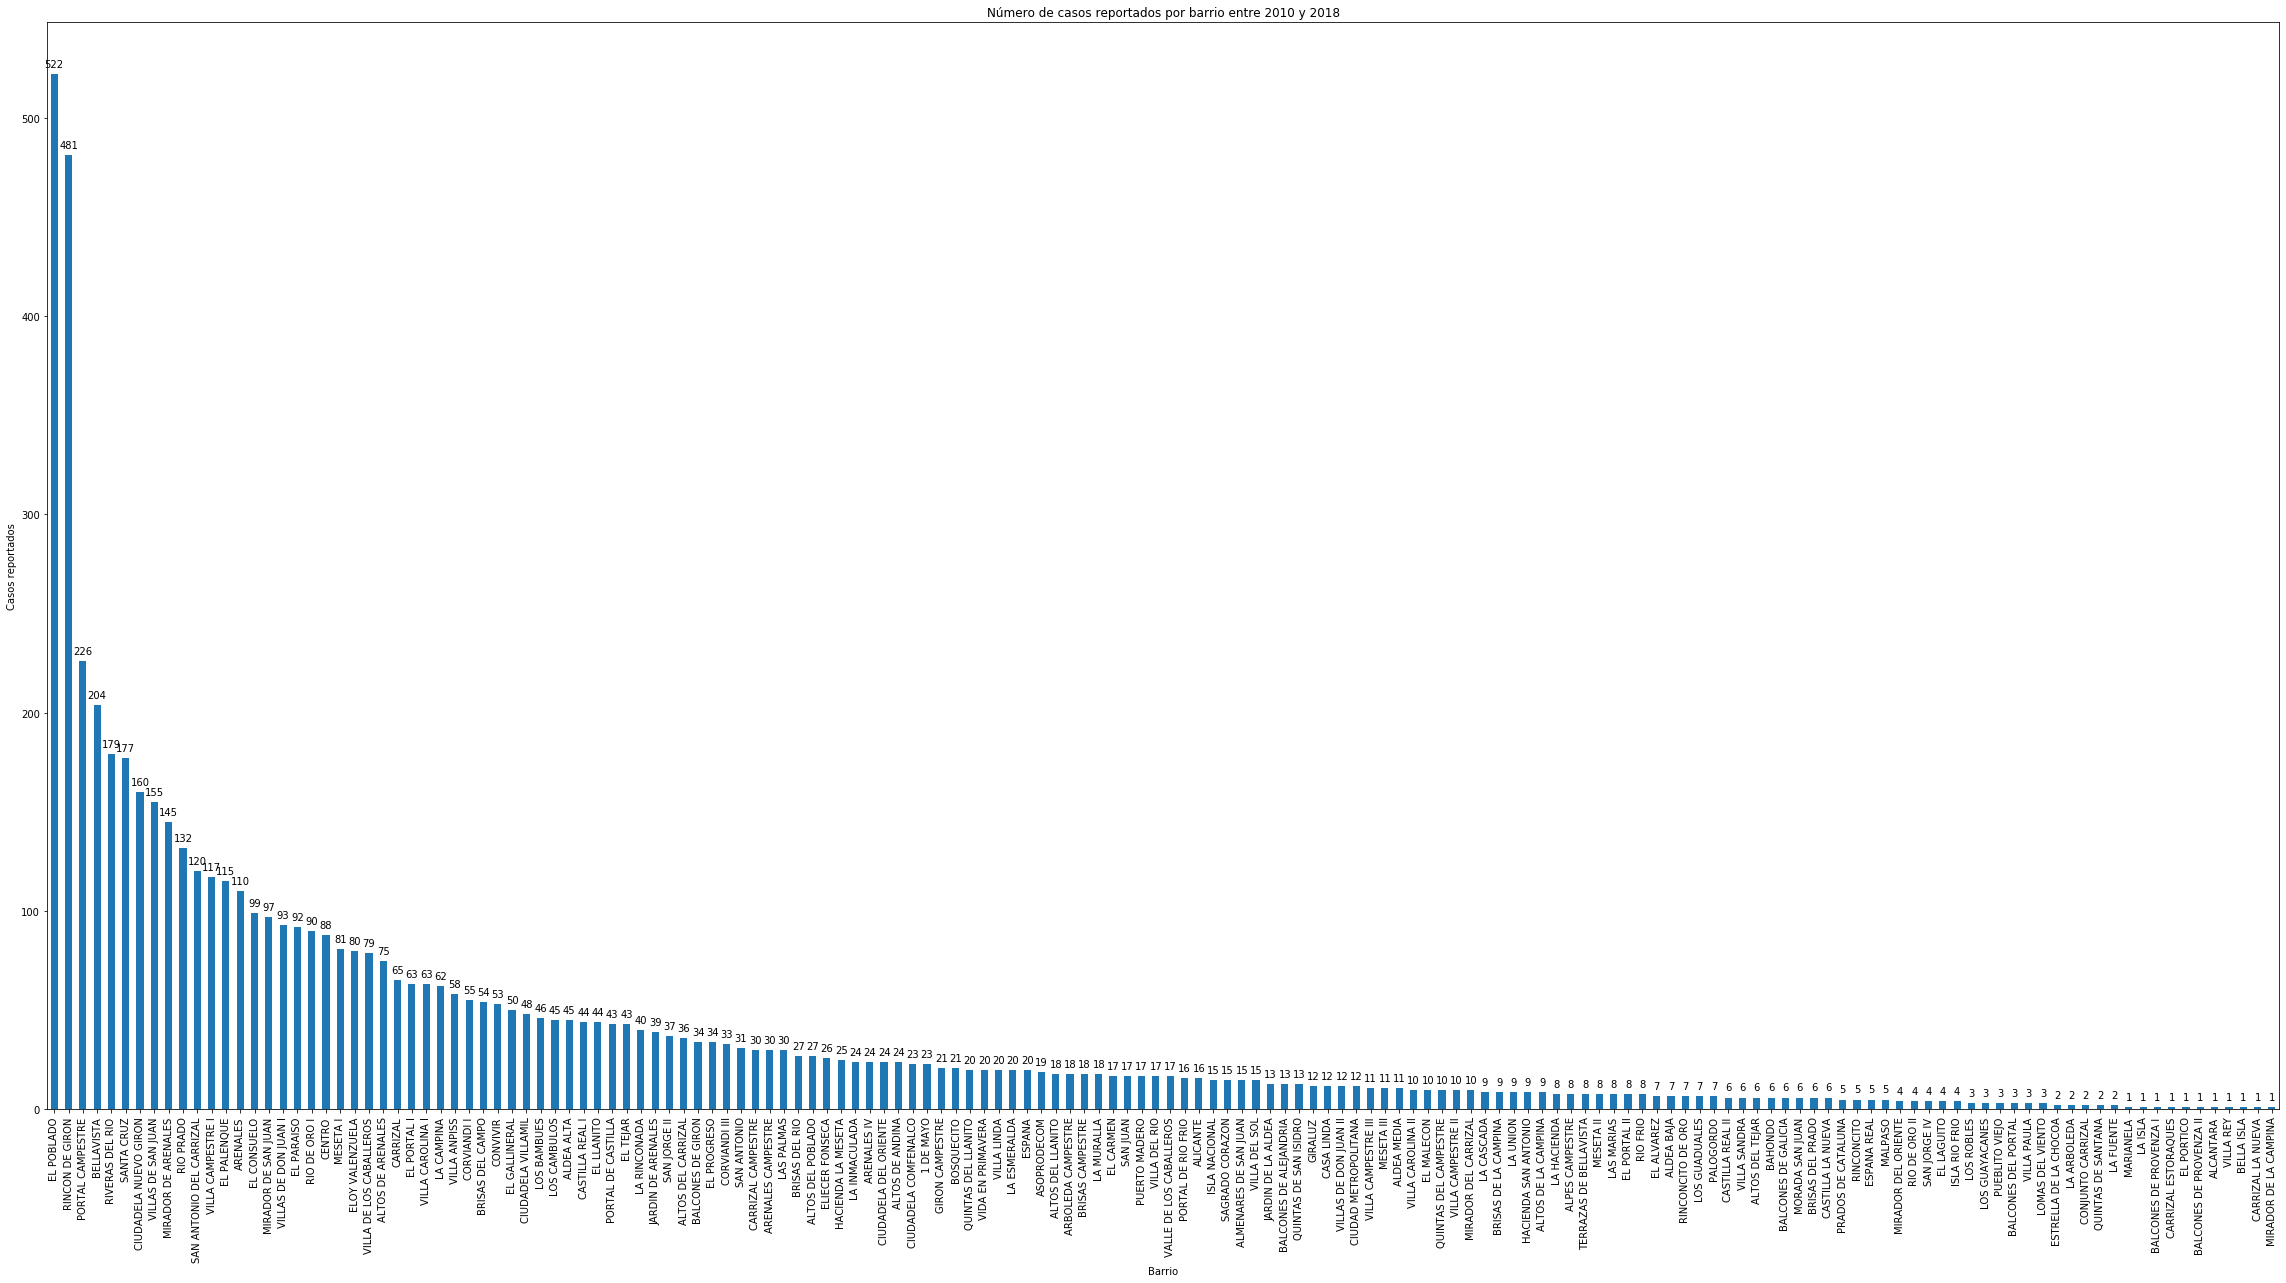

In [10]:
neighborhood = df['Barrio'].value_counts().plot(kind='bar', figsize=(40,20))
neighborhood.set_xlabel('Barrio')
neighborhood.set_ylabel('Casos reportados')
neighborhood.set_title('Número de casos reportados por barrio entre 2010 y 2018')

for p in neighborhood.patches:
    neighborhood.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

Text(0.5, 1.0, 'Número de casos reportados por año y barrio')

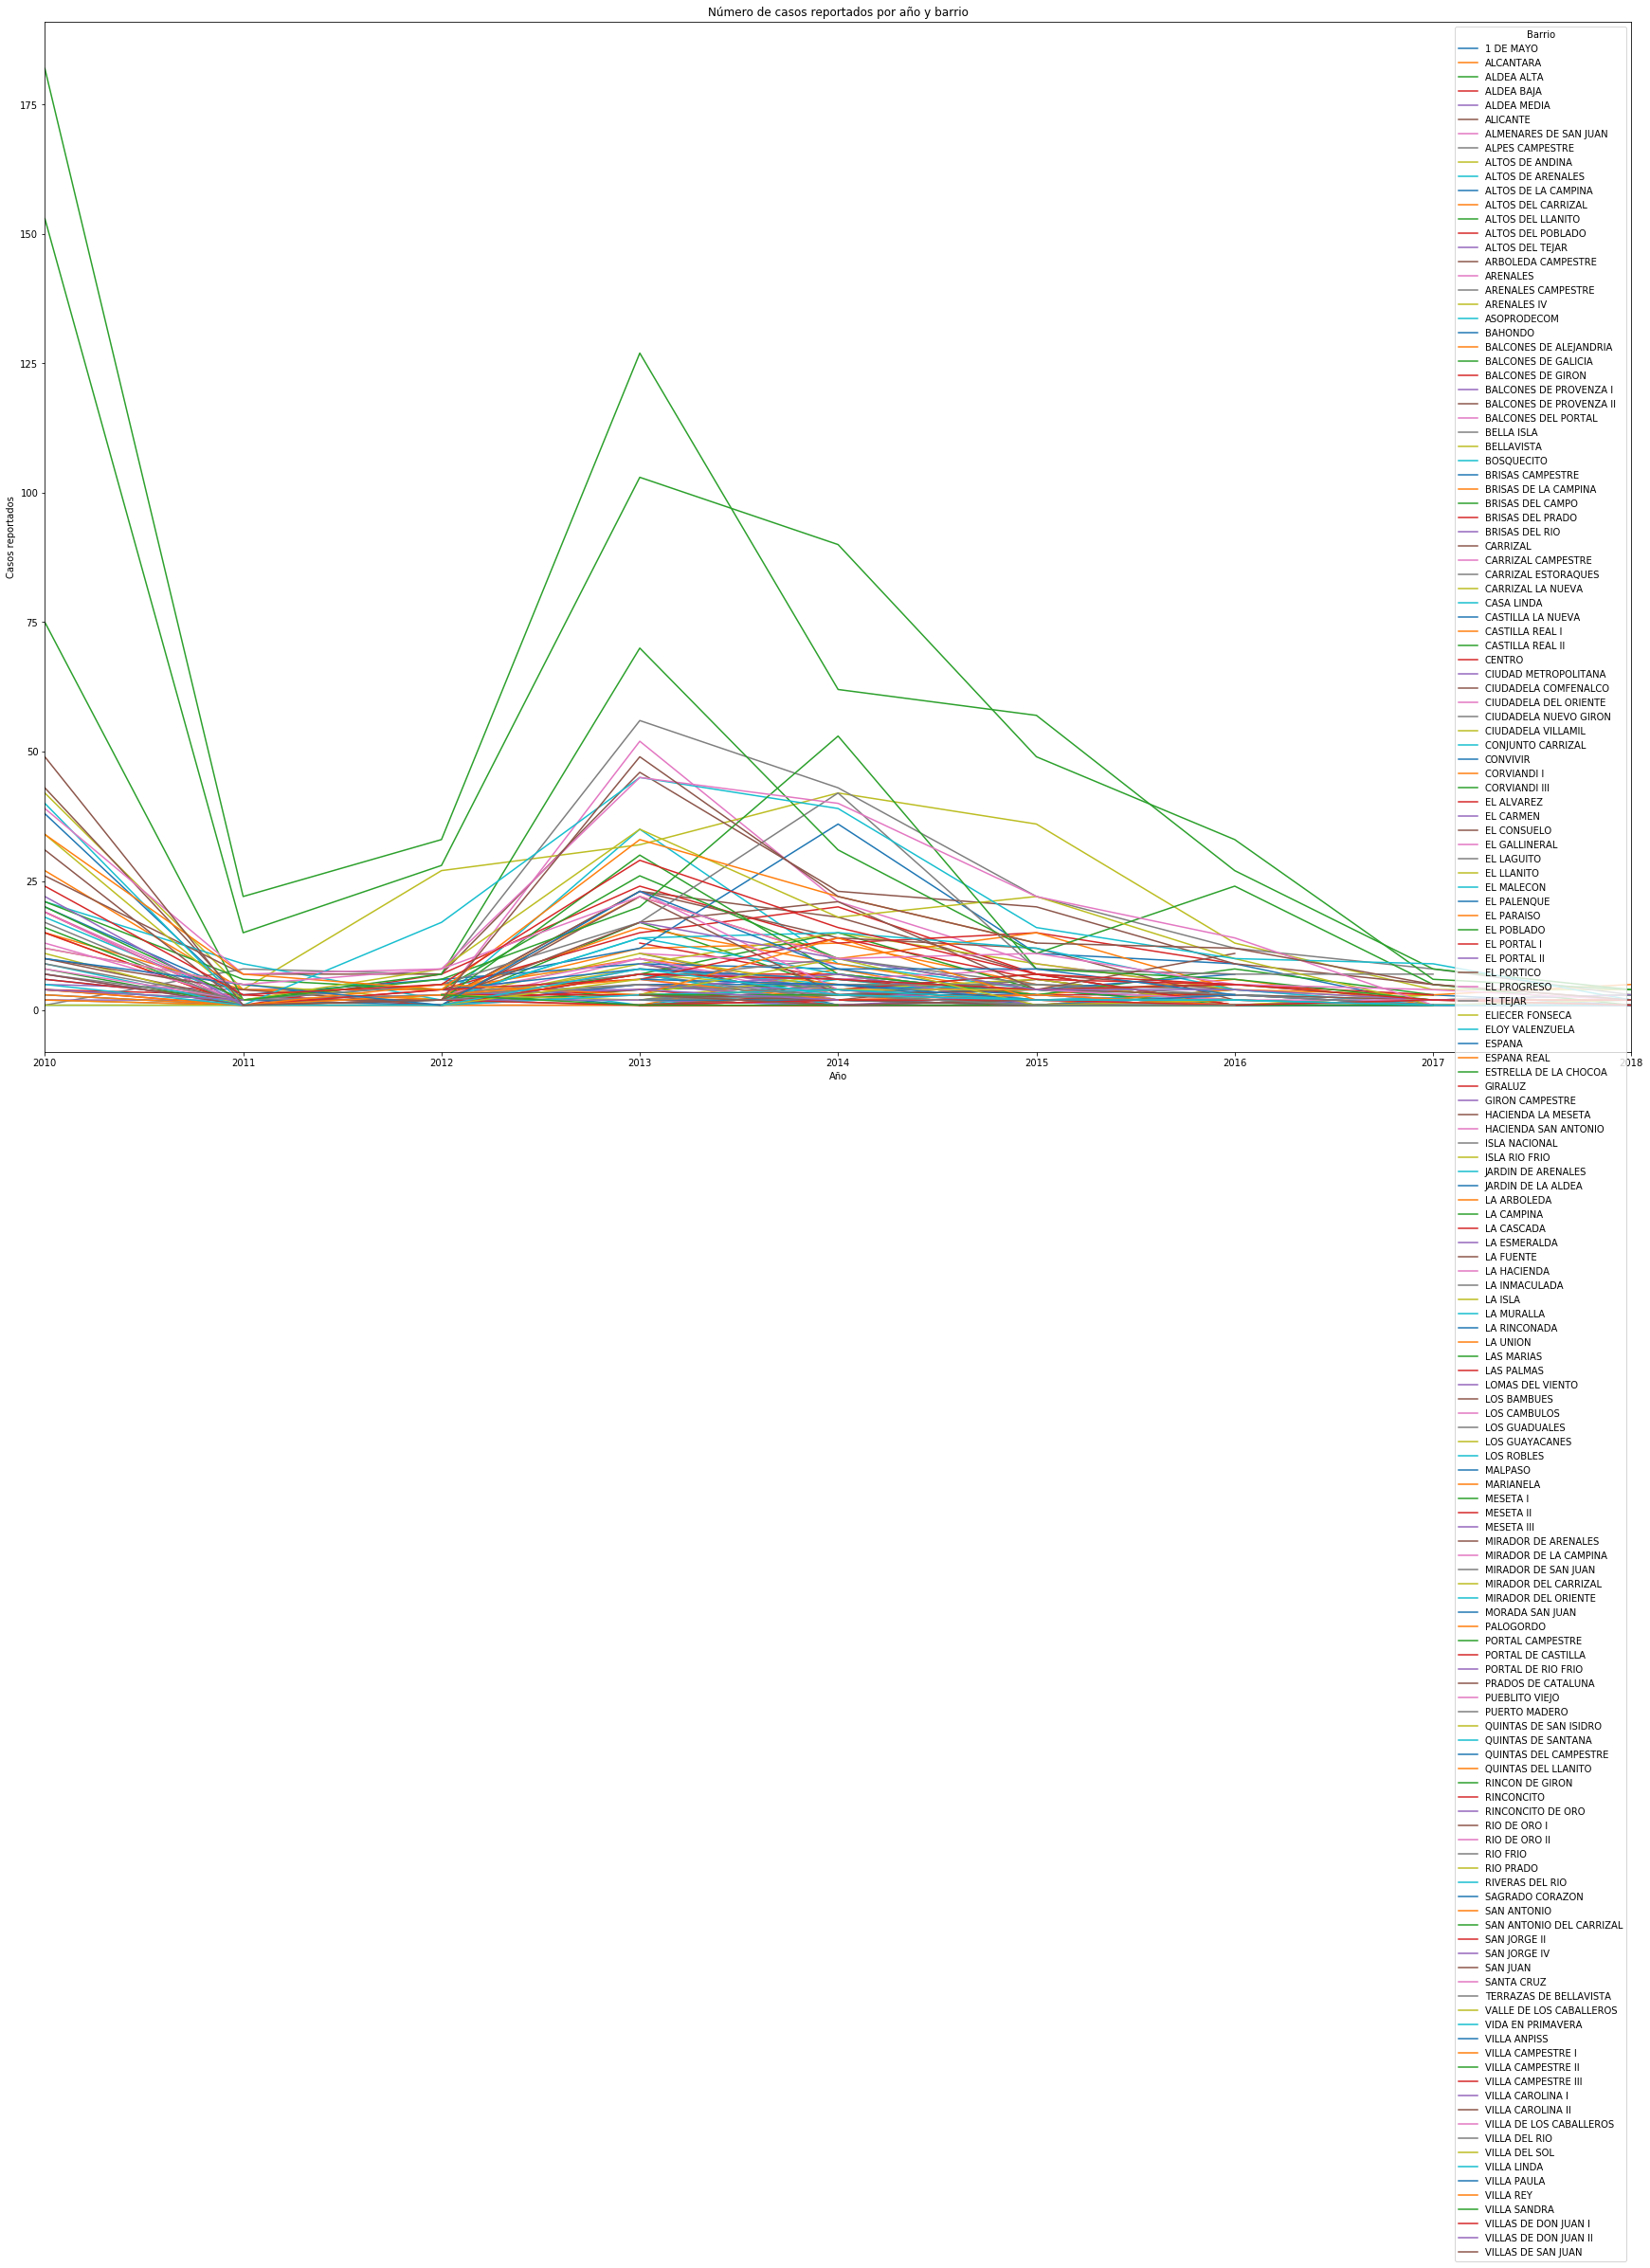

In [11]:
neighborhood_years = giron.groupby(["Ano", 'Barrio']).size().unstack(level=1).plot(kind='line', figsize=(30,20))
neighborhood_years.set_xlabel('Año')
neighborhood_years.set_ylabel('Casos reportados')
neighborhood_years.set_title('Número de casos reportados por año y barrio')

### *Número de casos reportados por rango de edad*

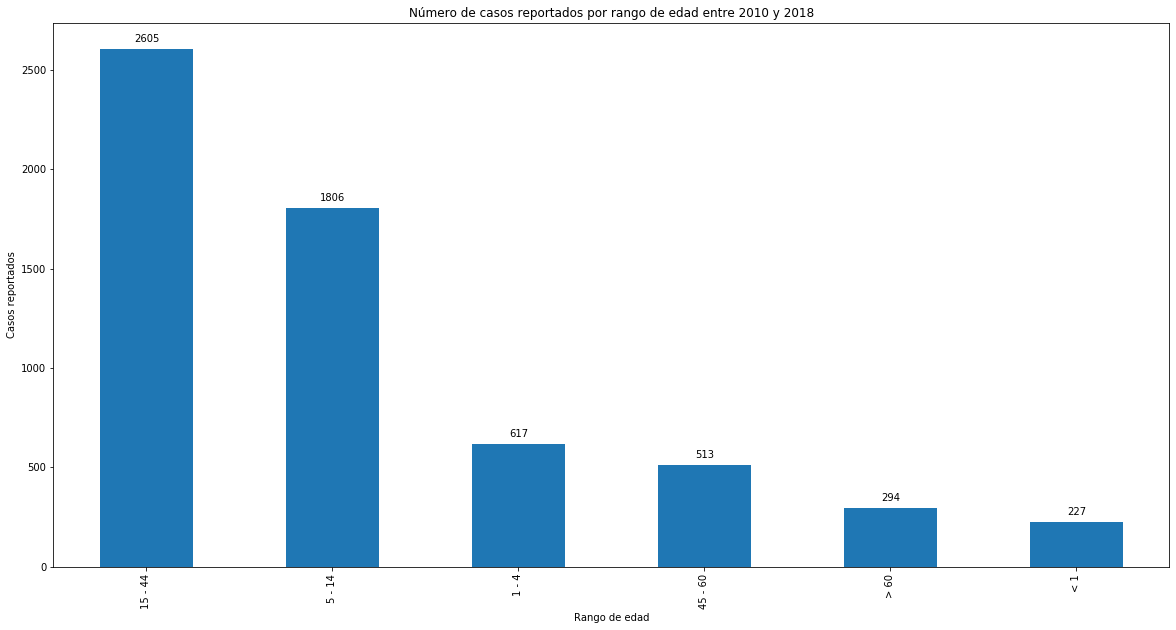

In [12]:
age_range = df['GrupoEdad'].value_counts().plot(kind='bar', figsize=(20,10))
age_range.set_xlabel('Rango de edad')
age_range.set_ylabel('Casos reportados')
age_range.set_title('Número de casos reportados por rango de edad entre 2010 y 2018')

for p in age_range.patches:
    age_range.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

Text(0.5, 1.0, 'Número de casos reportados por año y rango de edad')

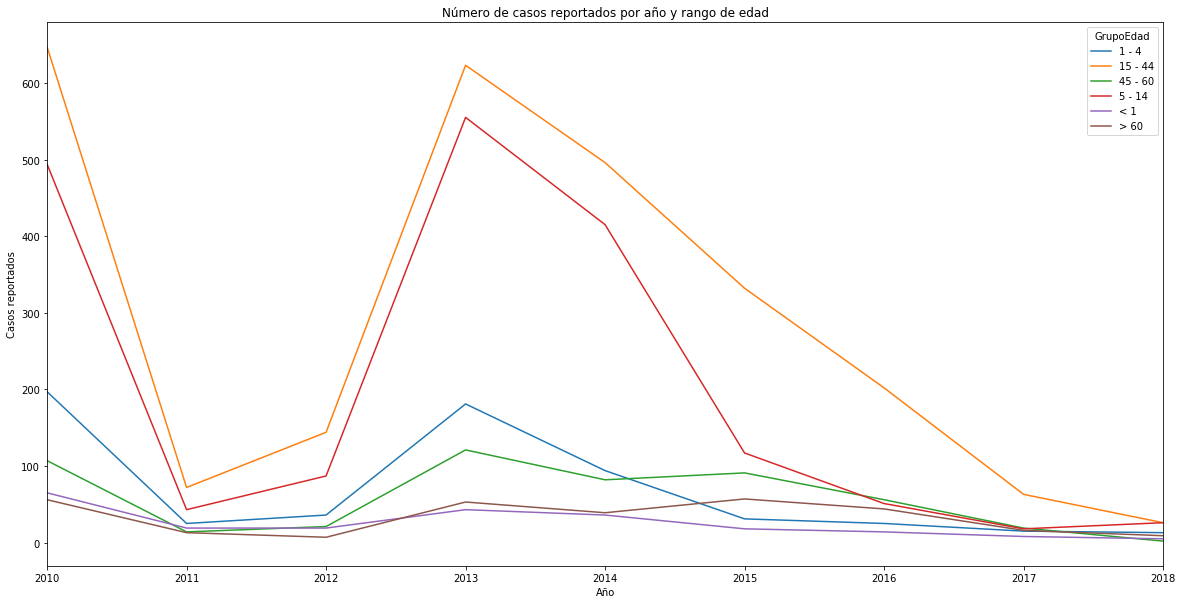

In [13]:
age_by_year = giron.groupby(["Ano", 'GrupoEdad']).size().unstack(level=1).plot(kind='line', figsize=(20,10))

age_by_year.set_xlabel('Año')
age_by_year.set_ylabel('Casos reportados')
age_by_year.set_title('Número de casos reportados por año y rango de edad')

### *Número de casos reportados por día*

Text(0.5, 1.0, 'Casos reportados por día')

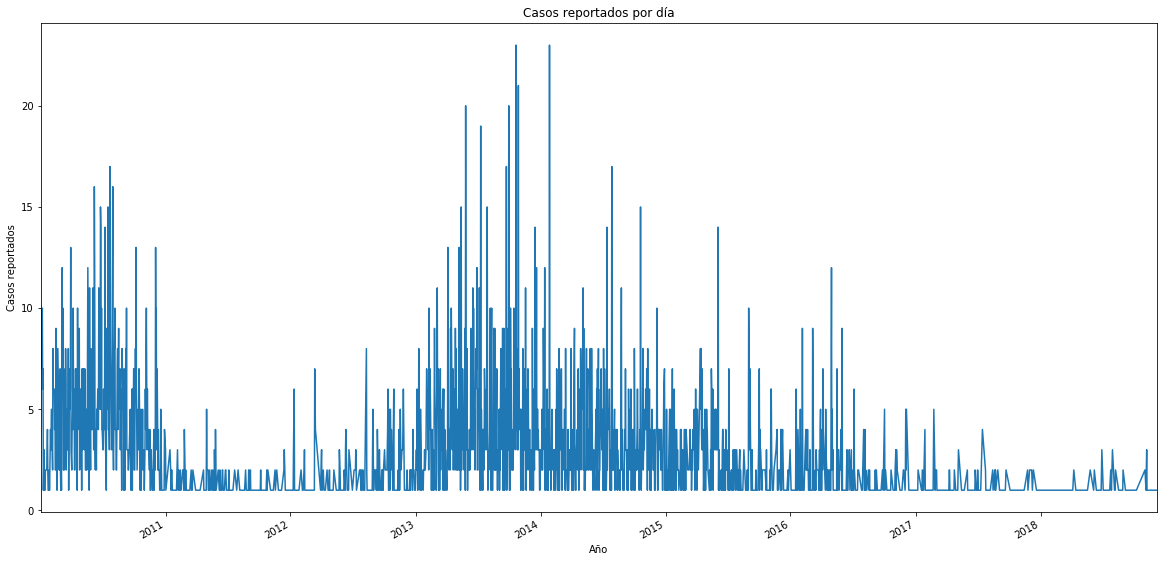

In [14]:
df["FecNot"]=pd.to_datetime(df['FecNot'])
df.sort_values(["FecNot"])
days = df['FecNot'].value_counts().plot(kind='line', figsize=(20, 10))
days.set_xlabel('Año')
days.set_ylabel('Casos reportados')
days.set_title('Casos reportados por día')

### PRUEBAS

Text(0.5, 1.0, 'Número de casos reportados en enero')

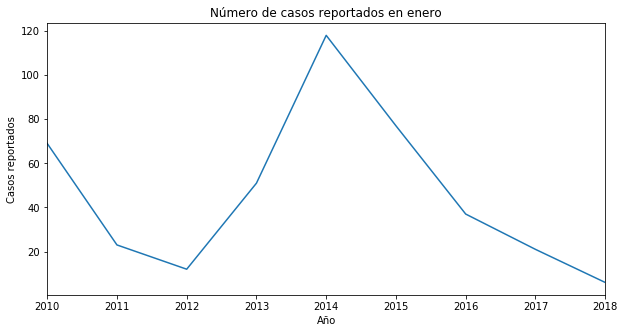

In [15]:
aux=df[df.MesOcurrencia == 'enero']
month=aux['Ano'].value_counts().sort_index().plot(kind='line', figsize=(10, 5))

month.set_xlabel('Año')
month.set_ylabel('Casos reportados')
month.set_title('Número de casos reportados en enero')

## ANÁLISIS DE SERIES DE TIEMPO

### *Pruebas de hipóstesis para determinar si el modelo es estacional o no* | DICKEY-FULLER TEST

**Hipótesis nula:** La serie de tiempo no es estacional  
**Hipótesis del investigador:** La serie de tiempo es estacional

*Si el estadístico ADF < Valor crítico entonces rechazo la hipótesis nula*  
*Si el estadístico ADF > Valor crítico entonces acepto la hipótesis nula*

### POR AÑO

In [16]:
results = adfuller(df['Ano'].value_counts().sort_index())
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    

Estadístico ADF: -2.354166
p-value: 0.155092
Valor crítico:
	1%: -4.665
	5%: -3.367
	10%: -2.803
Acepta Ho: La serie de tiempo no es estacionaria


## Análisis por mes

### ENERO

Estadístico ADF: -2.619138
p-value: 0.089106
Valor crítico:
	1%: -4.939
	5%: -3.478
	10%: -2.844
Acepta Ho: La serie de tiempo no es estacionaria

[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...

Estadístico ADF: -1.965799
p-value: 0.301767
Valor crítico:
	1%: -4.939
	5%: -3.478
	10%: -2.844
Acepta Ho: La serie de tiempo no es estacionaria


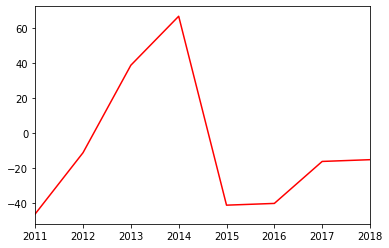

In [17]:
aux=df[df.MesOcurrencia == 'enero']
month=aux['Ano'].value_counts().sort_index()
results = adfuller(month)

print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')

for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
    month.plot(color="blue")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    print("\n[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...\n")
    
    aux=df[df.MesOcurrencia == 'enero']
    month = aux['Ano'].value_counts().sort_index().diff().dropna()
    results = adfuller(month)
    
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))
        
    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
        month.plot(color="blue")
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria")
        month.plot(color="red") 

### FEBRERO

Estadístico ADF: -2.415068
p-value: 0.137529
Valor crítico:
	1%: -4.939
	5%: -3.478
	10%: -2.844
Acepta Ho: La serie de tiempo no es estacionaria

[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...

Estadístico ADF: -2.713552
p-value: 0.071722
Valor crítico:
	1%: -4.939
	5%: -3.478
	10%: -2.844
Acepta Ho: La serie de tiempo no es estacionaria


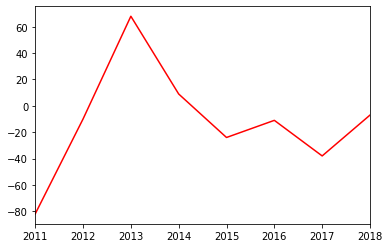

In [18]:
aux=df[df.MesOcurrencia == 'febrero']
month=aux['Ano'].value_counts().sort_index()
results = adfuller(month)

print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')

for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
    month.plot(color="blue")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    print("\n[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...\n")
    
    aux=df[df.MesOcurrencia == 'febrero']
    month = aux['Ano'].value_counts().sort_index().diff().dropna()
    results = adfuller(month)
    
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))
        
    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
        month.plot(color="blue")
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria")
        month.plot(color="red") 

### MARZO

Estadístico ADF: -2.050662
p-value: 0.264810
Valor crítico:
	1%: -4.939
	5%: -3.478
	10%: -2.844
Acepta Ho: La serie de tiempo no es estacionaria

[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...

Estadístico ADF: -3.465273
p-value: 0.008925
Valor crítico:
	1%: -4.939
	5%: -3.478
	10%: -2.844
Acepta Ho: La serie de tiempo no es estacionaria


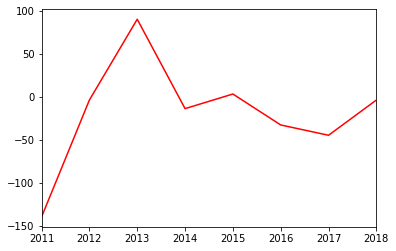

In [19]:
aux=df[df.MesOcurrencia == 'marzo']
month=aux['Ano'].value_counts().sort_index()
results = adfuller(month)

print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')

for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
    month.plot(color="blue")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    print("\n[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...\n")
    
    aux=df[df.MesOcurrencia == 'marzo']
    month = aux['Ano'].value_counts().sort_index().diff().dropna()
    results = adfuller(month)
    
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))
        
    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
        month.plot(color="blue")
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria")
        month.plot(color="red") 

### ABRIL

Estadístico ADF: -2.650004
p-value: 0.083096
Valor crítico:
	1%: -4.665
	5%: -3.367
	10%: -2.803
Acepta Ho: La serie de tiempo no es estacionaria

[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...

Estadístico ADF: -3.333033
p-value: 0.013465
Valor crítico:
	1%: -4.939
	5%: -3.478
	10%: -2.844
Acepta Ho: La serie de tiempo no es estacionaria


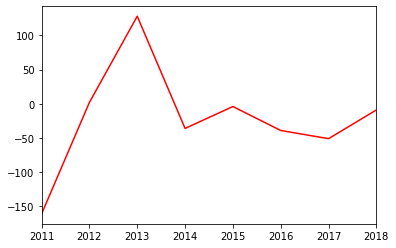

In [20]:
aux=df[df.MesOcurrencia == 'abril']
month=aux['Ano'].value_counts().sort_index()
results = adfuller(month)

print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')

for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
    month.plot(color="blue")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    print("\n[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...\n")
    
    aux=df[df.MesOcurrencia == 'abril']
    month = aux['Ano'].value_counts().sort_index().diff().dropna()
    results = adfuller(month)
    
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))
        
    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
        month.plot(color="blue")
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria")
        month.plot(color="red") 

### MAYO

Estadístico ADF: -2.468586
p-value: 0.123306
Valor crítico:
	1%: -4.665
	5%: -3.367
	10%: -2.803
Acepta Ho: La serie de tiempo no es estacionaria

[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...

Estadístico ADF: -3.326763
p-value: 0.013724
Valor crítico:
	1%: -4.939
	5%: -3.478
	10%: -2.844
Acepta Ho: La serie de tiempo no es estacionaria


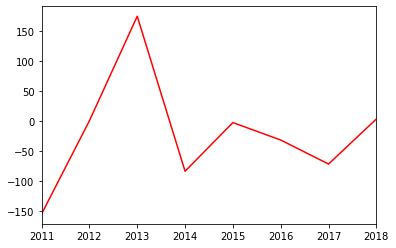

In [21]:
aux=df[df.MesOcurrencia == 'mayo']
month=aux['Ano'].value_counts().sort_index()
results = adfuller(month)

print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')

for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
    month.plot(color="blue")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    print("\n[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...\n")
    
    aux=df[df.MesOcurrencia == 'mayo']
    month = aux['Ano'].value_counts().sort_index().diff().dropna()
    results = adfuller(month)
    
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))
        
    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
        month.plot(color="blue")
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria")
        month.plot(color="red") 

### JUNIO

Estadístico ADF: 0.021886
p-value: 0.960305
Valor crítico:
	1%: -5.354
	5%: -3.646
	10%: -2.901
Acepta Ho: La serie de tiempo no es estacionaria

[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...

Estadístico ADF: -4.736749
p-value: 0.000072
Valor crítico:
	1%: -6.045
	5%: -3.929
	10%: -2.987
Rechazo Ho: La serie de tiempo es estacionaria


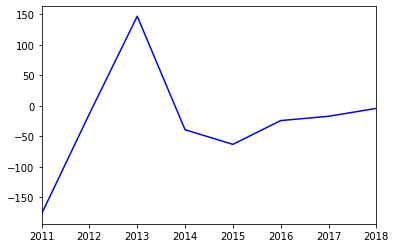

In [22]:
aux=df[df.MesOcurrencia == 'junio']
month=aux['Ano'].value_counts().sort_index()
results = adfuller(month)

print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')

for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
    month.plot(color="blue")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    print("\n[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...\n")
    
    aux=df[df.MesOcurrencia == 'junio']
    month = aux['Ano'].value_counts().sort_index().diff().dropna()
    results = adfuller(month)
    
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))
        
    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
        month.plot(color="blue")
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria")
        month.plot(color="red") 

### JULIO

Estadístico ADF: 0.007990
p-value: 0.959188
Valor crítico:
	1%: -5.354
	5%: -3.646
	10%: -2.901
Acepta Ho: La serie de tiempo no es estacionaria

[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...

Estadístico ADF: -2.725745
p-value: 0.069688
Valor crítico:
	1%: -6.045
	5%: -3.929
	10%: -2.987
Acepta Ho: La serie de tiempo no es estacionaria


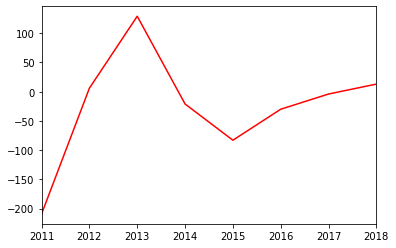

In [33]:
aux=df[df.MesOcurrencia == 'julio']
month=aux['Ano'].value_counts().sort_index()
results = adfuller(month)

print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')

for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
    month.plot(color="blue")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    print("\n[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...\n")
    
    aux=df[df.MesOcurrencia == 'julio']
    month = aux['Ano'].value_counts().sort_index().diff().dropna()
    results = adfuller(month)
    
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))
        
    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
        month.plot(color="blue")
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria")
        month.plot(color="red") 

### AGOSTO

Estadístico ADF: 0.080769
p-value: 0.964723
Valor crítico:
	1%: -5.354
	5%: -3.646
	10%: -2.901
Acepta Ho: La serie de tiempo no es estacionaria

[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...

Estadístico ADF: -3.229623
p-value: 0.018333
Valor crítico:
	1%: -6.045
	5%: -3.929
	10%: -2.987
Acepta Ho: La serie de tiempo no es estacionaria


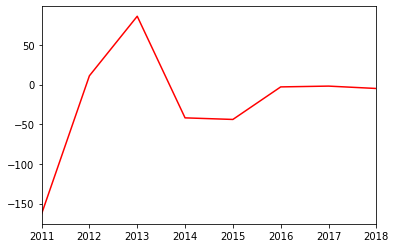

In [24]:
aux=df[df.MesOcurrencia == 'agosto']
month=aux['Ano'].value_counts().sort_index()
results = adfuller(month)

print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')

for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
    month.plot(color="blue")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    print("\n[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...\n")
    
    aux=df[df.MesOcurrencia == 'agosto']
    month = aux['Ano'].value_counts().sort_index().diff().dropna()
    results = adfuller(month)
    
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))
        
    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
        month.plot(color="blue")
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria")
        month.plot(color="red") 

### SEPTIEMBRE

Estadístico ADF: -2.033580
p-value: 0.272046
Valor crítico:
	1%: -5.354
	5%: -3.646
	10%: -2.901
Acepta Ho: La serie de tiempo no es estacionaria

[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...

Estadístico ADF: -2.611188
p-value: 0.090707
Valor crítico:
	1%: -6.045
	5%: -3.929
	10%: -2.987
Acepta Ho: La serie de tiempo no es estacionaria


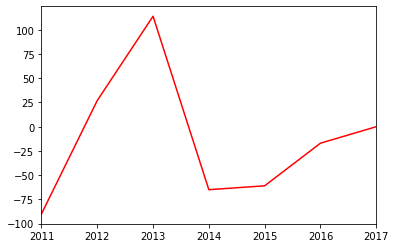

In [25]:
aux=df[df.MesOcurrencia == 'septiembre']
month=aux['Ano'].value_counts().sort_index()
results = adfuller(month)

print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')

for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
    month.plot(color="blue")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    print("\n[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...\n")
    
    aux=df[df.MesOcurrencia == 'septiembre']
    month = aux['Ano'].value_counts().sort_index().diff().dropna()
    results = adfuller(month)
    
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))
        
    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
        month.plot(color="blue")
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria")
        month.plot(color="red") 

### OCTUBRE

Estadístico ADF: -1.988111
p-value: 0.291810
Valor crítico:
	1%: -5.354
	5%: -3.646
	10%: -2.901
Acepta Ho: La serie de tiempo no es estacionaria

[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...

Estadístico ADF: -2.310406
p-value: 0.168634
Valor crítico:
	1%: -6.045
	5%: -3.929
	10%: -2.987
Acepta Ho: La serie de tiempo no es estacionaria


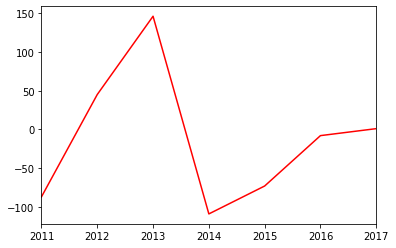

In [26]:
aux=df[df.MesOcurrencia == 'octubre']
month=aux['Ano'].value_counts().sort_index()
results = adfuller(month)

print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')

for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
    month.plot(color="blue")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    print("\n[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...\n")
    
    aux=df[df.MesOcurrencia == 'octubre']
    month = aux['Ano'].value_counts().sort_index().diff().dropna()
    results = adfuller(month)
    
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))
        
    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
        month.plot(color="blue")
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria")
        month.plot(color="red") 

### NOVIEMBRE

Estadístico ADF: -2.116104
p-value: 0.238089
Valor crítico:
	1%: -5.354
	5%: -3.646
	10%: -2.901
Acepta Ho: La serie de tiempo no es estacionaria

[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...

Estadístico ADF: -2.699315
p-value: 0.074157
Valor crítico:
	1%: -6.045
	5%: -3.929
	10%: -2.987
Acepta Ho: La serie de tiempo no es estacionaria


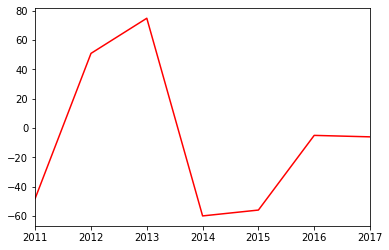

In [27]:
aux=df[df.MesOcurrencia == 'noviembre']
month=aux['Ano'].value_counts().sort_index()
results = adfuller(month)

print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')

for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
    month.plot(color="blue")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    print("\n[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...\n")
    
    aux=df[df.MesOcurrencia == 'noviembre']
    month = aux['Ano'].value_counts().sort_index().diff().dropna()
    results = adfuller(month)
    
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))
        
    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
        month.plot(color="blue")
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria")
        month.plot(color="red") 

### DICIEMBRE

Estadístico ADF: -1.981939
p-value: 0.294548
Valor crítico:
	1%: -4.939
	5%: -3.478
	10%: -2.844
Acepta Ho: La serie de tiempo no es estacionaria

[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...

Estadístico ADF: -2.643004
p-value: 0.084431
Valor crítico:
	1%: -5.354
	5%: -3.646
	10%: -2.901
Acepta Ho: La serie de tiempo no es estacionaria


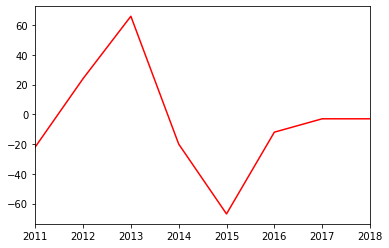

In [28]:
aux=df[df.MesOcurrencia == 'diciembre']
month=aux['Ano'].value_counts().sort_index()
results = adfuller(month)

print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')

for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
    month.plot(color="blue")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    print("\n[+] Dado que la serie de tiempo no es estacionaria se procederá a transformarla...\n")
    
    aux=df[df.MesOcurrencia == 'diciembre']
    month = aux['Ano'].value_counts().sort_index().diff().dropna()
    results = adfuller(month)
    
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))
        
    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
        month.plot(color="blue")
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria")
        month.plot(color="red") 

### **Los meses que aplican un modelo lineal estacional son:**

- Junio